In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

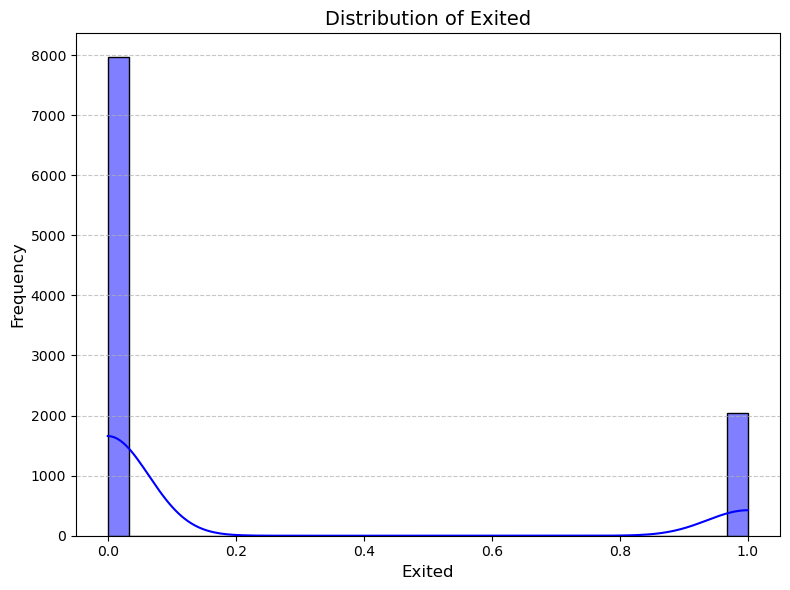

In [10]:
# Plot histogram of the 'Exited' column
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(df['Exited'], kde=True, color='blue', bins=30)  
plt.title('Distribution of Exited', fontsize=14)  # Add a descriptive title with larger font size
plt.xlabel('Exited', fontsize=12)  # Label the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


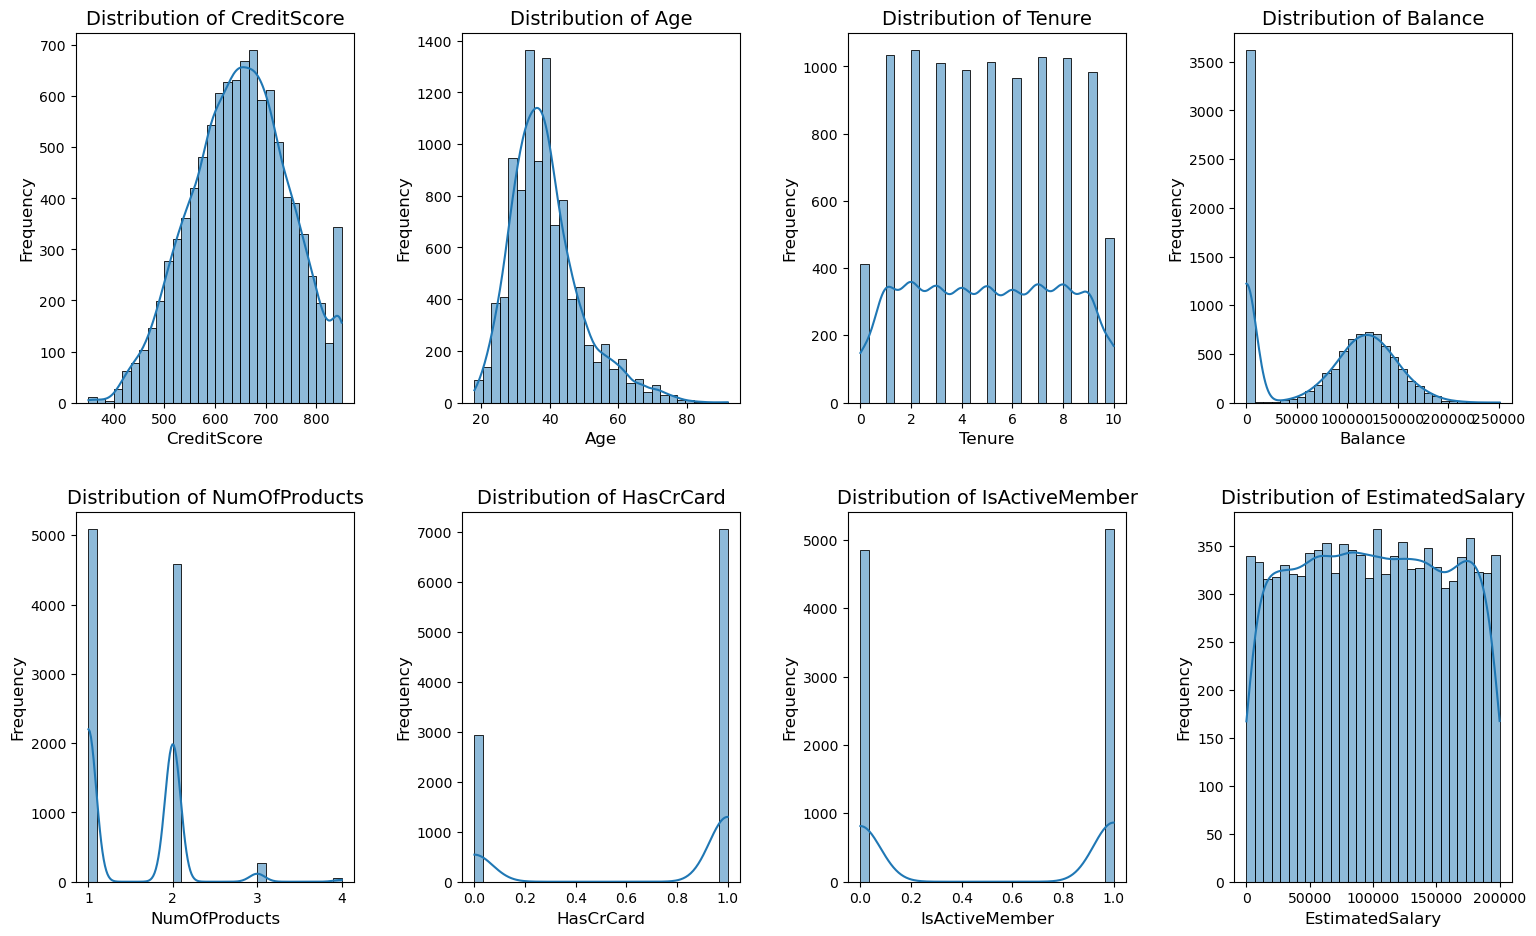

In [11]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                     'IsActiveMember', 'EstimatedSalary']

plt.figure(figsize=(16, 10))  # Increase the figure size
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(2, 4, i)  # Arrange into 2 rows and 4 columns
    sns.histplot(data=df, x=col, kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3.0)  # Add padding for better spacing
plt.show()


In [12]:
categorical_columns = df.select_dtypes(['object']).columns
categorical_columns

Index(['Geography', 'Gender'], dtype='object')

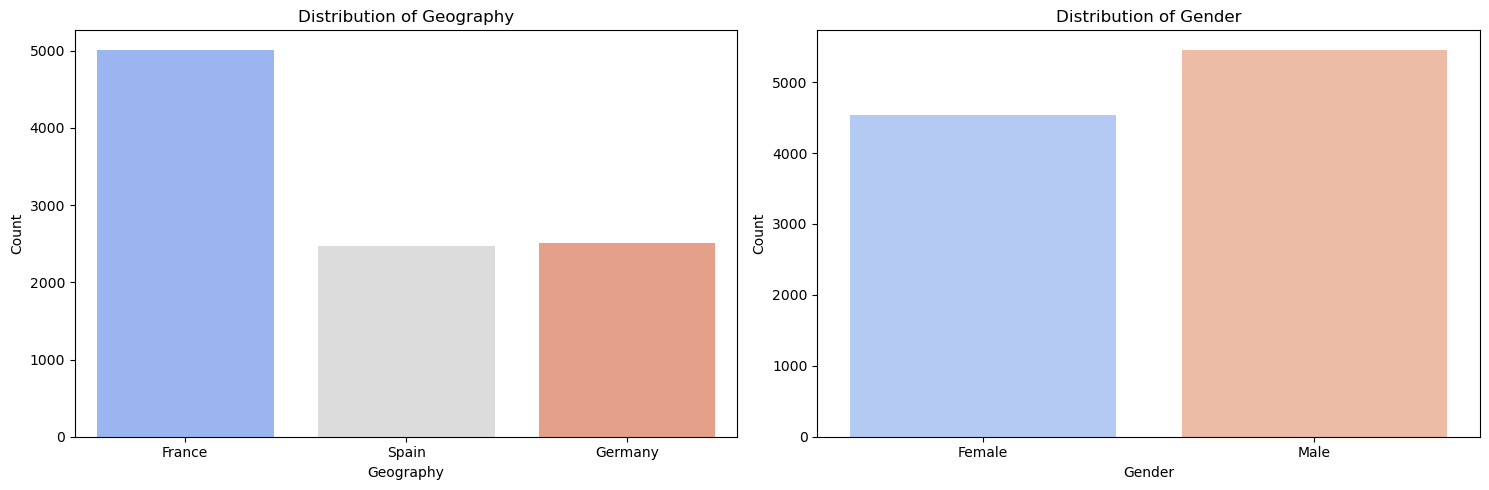

In [13]:
categorical_columns = ['Geography', 'Gender']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=column,palette='coolwarm')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

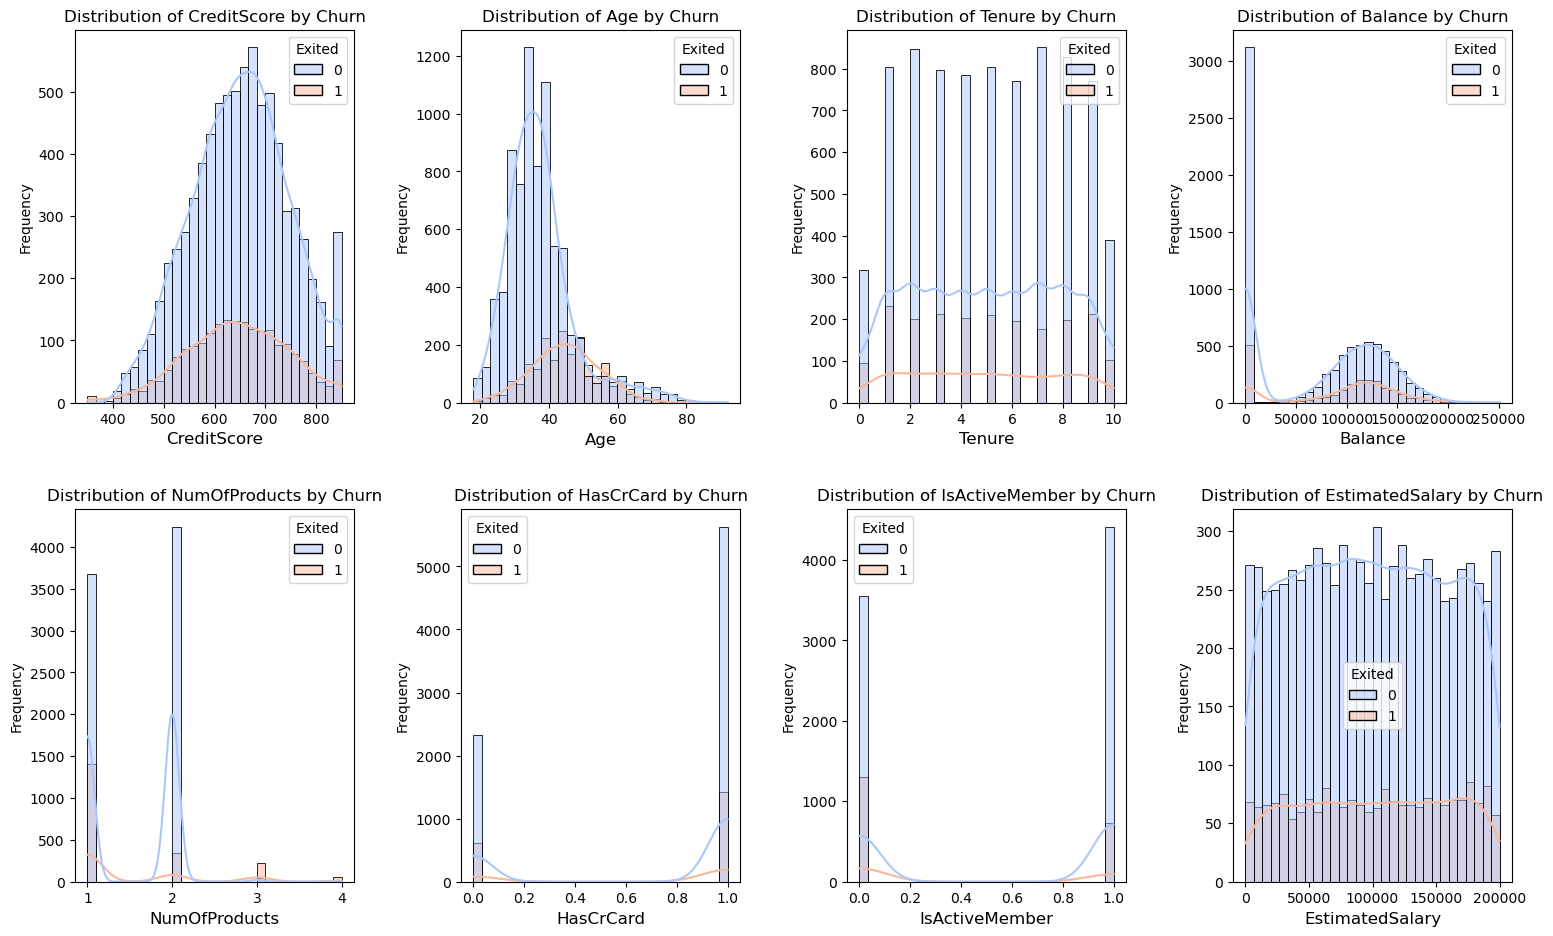

In [14]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                     'IsActiveMember', 'EstimatedSalary']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=column, hue="Exited", kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout(pad=3.0)
plt.show()

In [15]:
df[numerical_columns].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
dtype: float64

In [16]:
# Adding a small constant to ensure all values are positive if necessary
df['Age_BoxCox'], _ = boxcox(df['Age'] + 1e-6)  # Box-Cox Transformation

In [17]:
df['NumOfProducts_Sqrt'] = np.sqrt(df['NumOfProducts'])

In [18]:
df['HasCrCard_Log'] = np.log1p(df['HasCrCard'])  # Log transformation (if required)

In [19]:
print(df[['Age_BoxCox', 'NumOfProducts_Sqrt', 'HasCrCard_Log']].skew())

Age_BoxCox           -0.002397
NumOfProducts_Sqrt    0.420528
HasCrCard_Log        -0.901812
dtype: float64


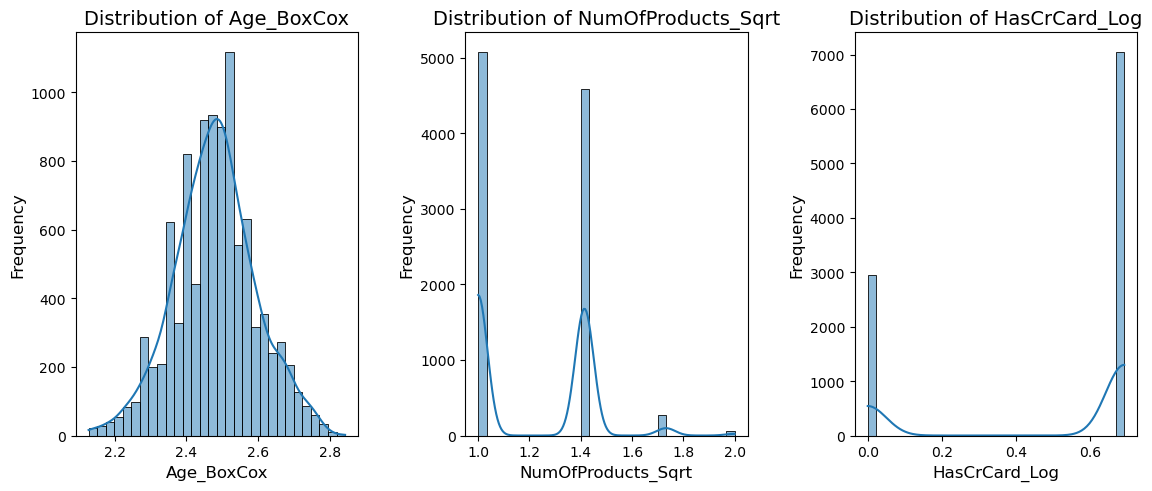

In [20]:
numeric_columns = ['Age_BoxCox','NumOfProducts_Sqrt','HasCrCard_Log']

plt.figure(figsize=(16, 10))  # Increase the figure size
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(2, 4, i)  # Arrange into 2 rows and 4 columns
    sns.histplot(data=df, x=col, kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=3.0)  # Add padding for better spacing
plt.show()

In [21]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Age_BoxCox            0
NumOfProducts_Sqrt    0
HasCrCard_Log         0
dtype: int64

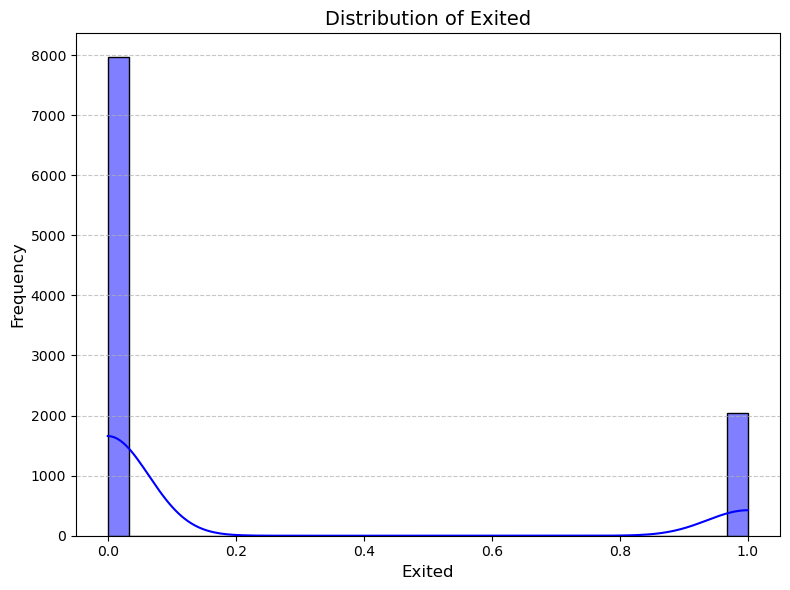

In [22]:
# Plot histogram of the 'Exited' column
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(df['Exited'], kde=True, color='blue', bins=30)  
plt.title('Distribution of Exited', fontsize=14)  # Add a descriptive title with larger font size
plt.xlabel('Exited', fontsize=12)  # Label the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


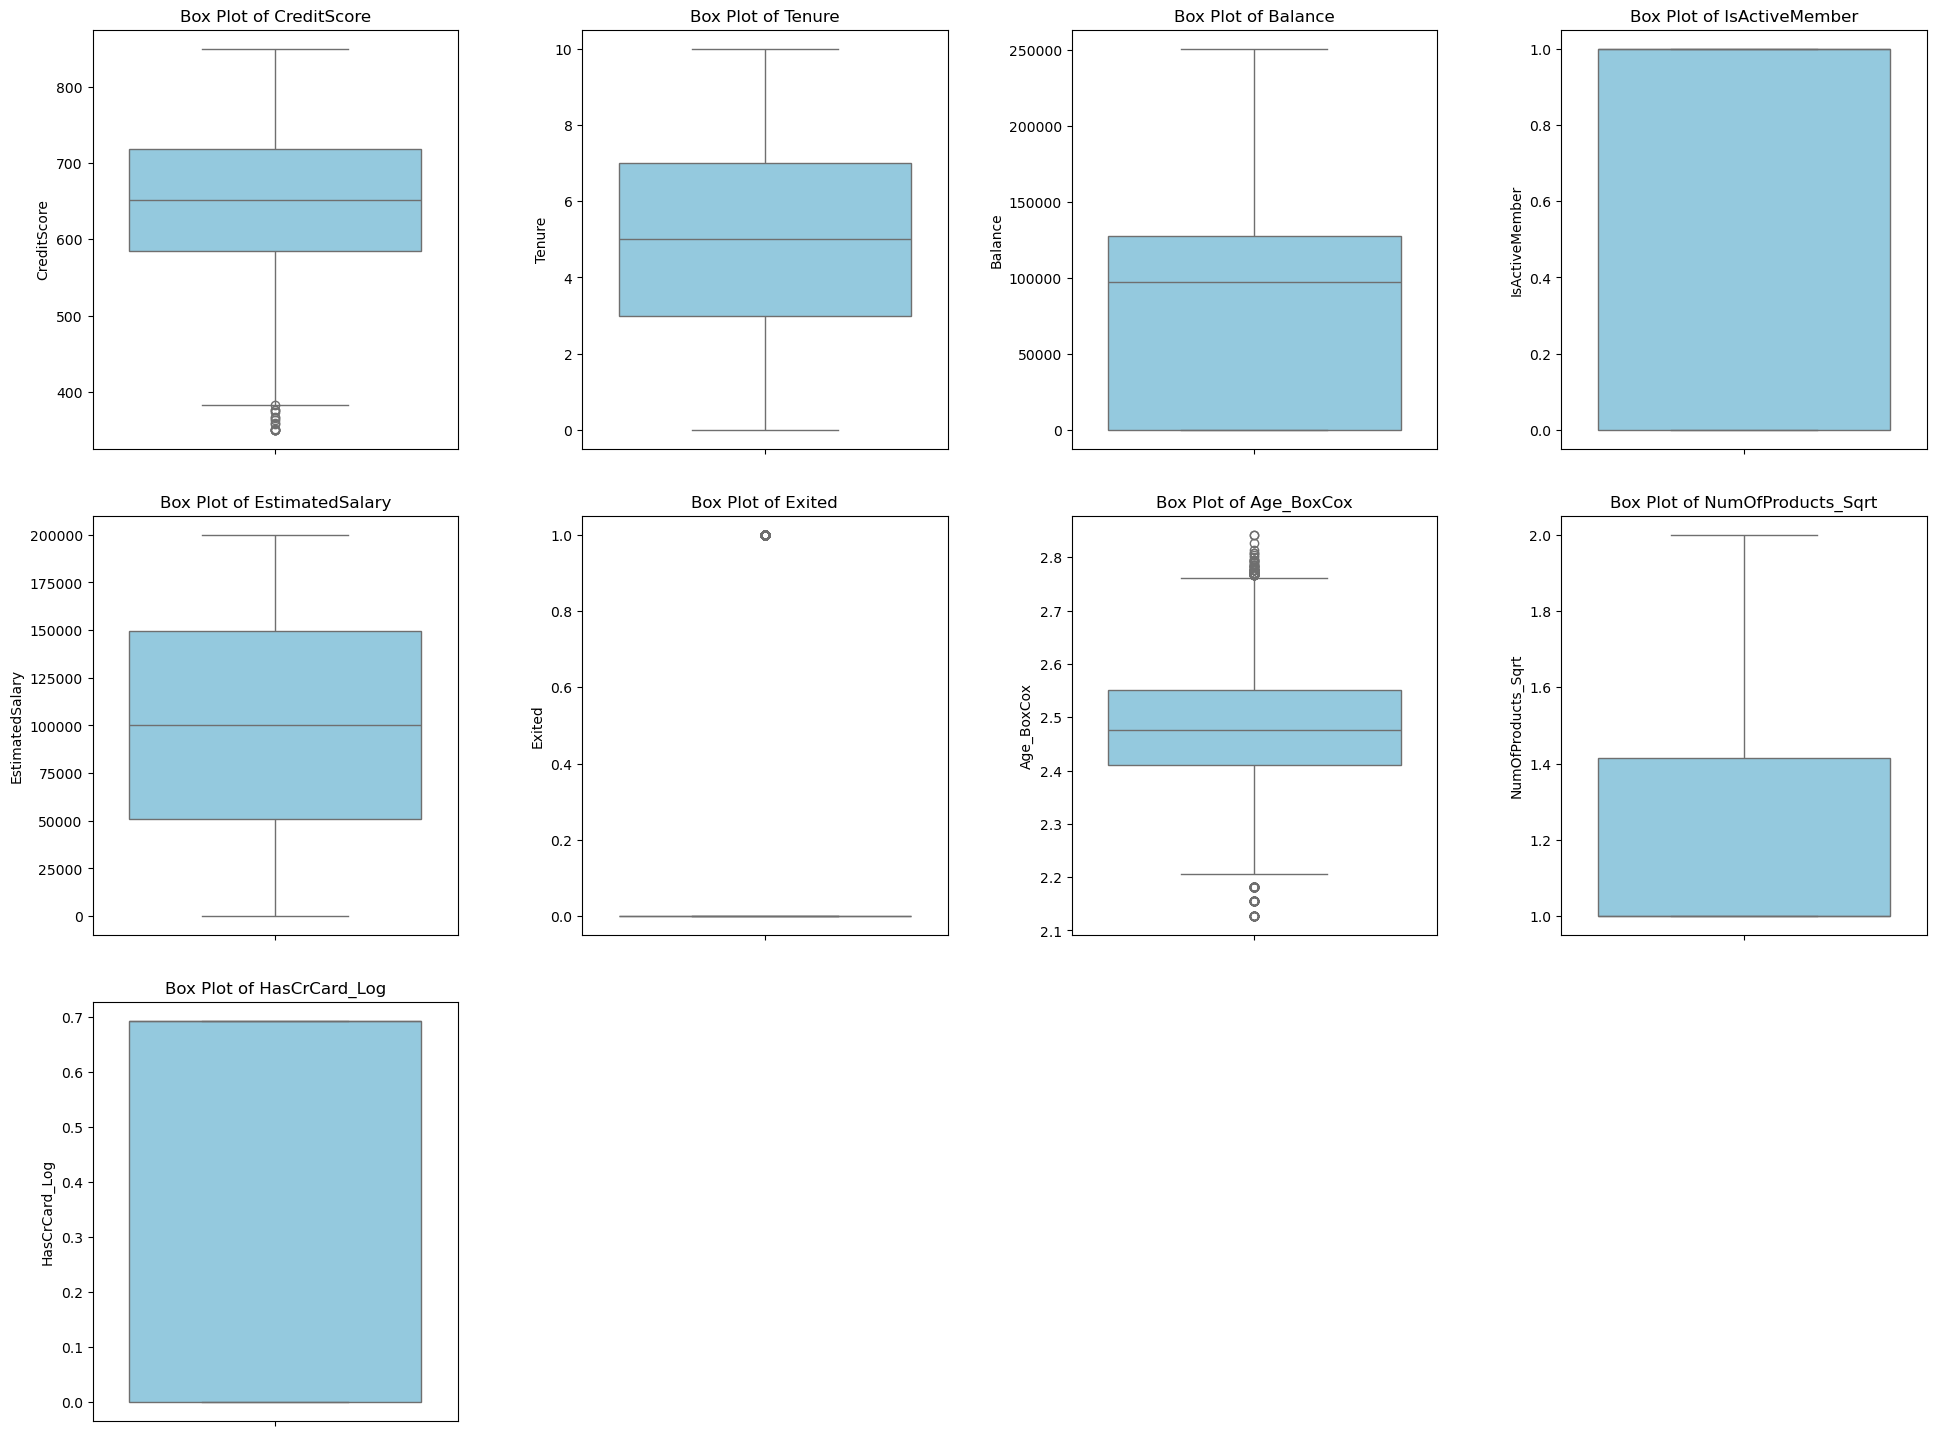

In [23]:
# List of numeric columns for box plots
numeric_columns = ['CreditScore', 'Tenure', 'Balance','IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_BoxCox',
                   'NumOfProducts_Sqrt', 'HasCrCard_Log']

# Adjust figure size for better visualization
plt.figure(figsize=(20, 15))  

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(3, 4, i)  # Adjust subplot grid to fit all columns (3 rows, 5 columns)
    sns.boxplot(data=df, y=column, color='skyblue')
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.ylabel(column, fontsize=10)

plt.tight_layout(pad=3.0)  # Add padding to prevent overlapping
plt.show()


In [24]:
df.drop(columns=['Age','NumOfProducts','HasCrCard'],inplace=True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited,Age_BoxCox,NumOfProducts_Sqrt,HasCrCard_Log
0,619,France,Female,2,0.00,1,101348.88,1,2.530867,1.000000,0.693147
1,608,Spain,Female,1,83807.86,1,112542.58,0,2.520415,1.000000,0.000000
2,502,France,Female,8,159660.80,0,113931.57,1,2.530867,1.732051,0.693147
3,699,France,Female,1,0.00,0,93826.63,0,2.498541,1.414214,0.000000
4,850,Spain,Female,2,125510.82,1,79084.10,0,2.541019,1.000000,0.693147


In [26]:
df.rename(columns={'Age_BoxCox':'Age'},inplace=True)
df.rename(columns={'NumOfProducts_Sqrt':'NumOfProducts'},inplace=True)
df.rename(columns={'HasCrCard_Log':'HasCrCard'},inplace=True)

In [27]:
def outlier_detection(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [28]:
outlier_detection(df,df[['CreditScore','Age']])

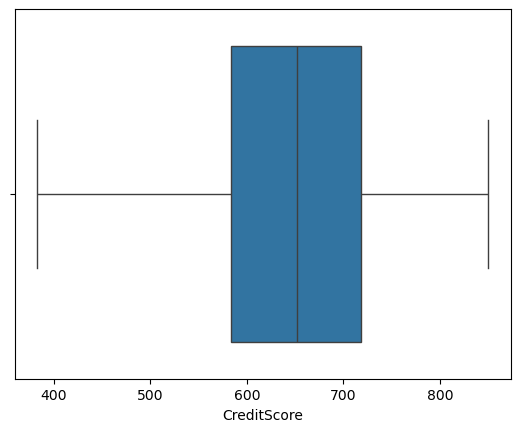

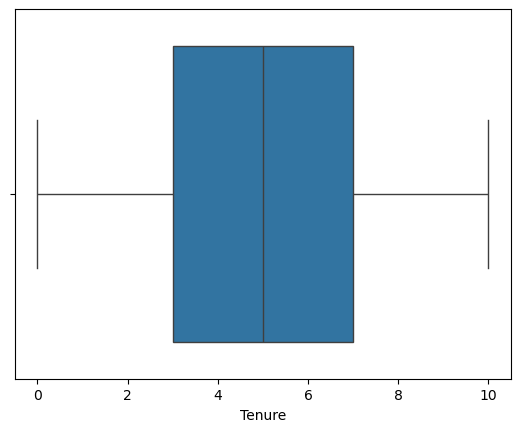

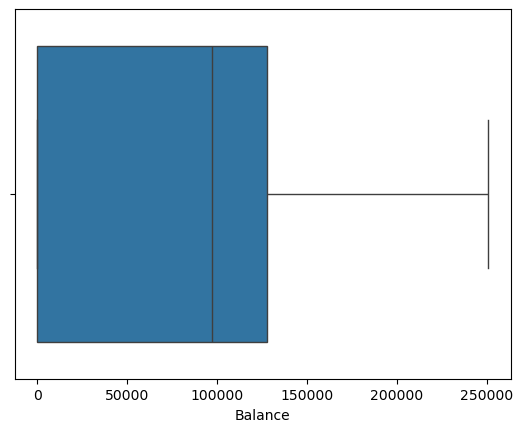

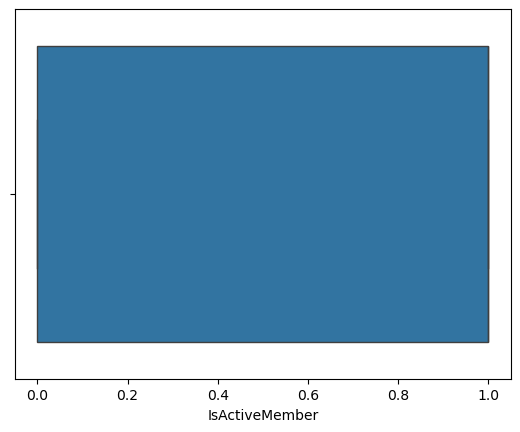

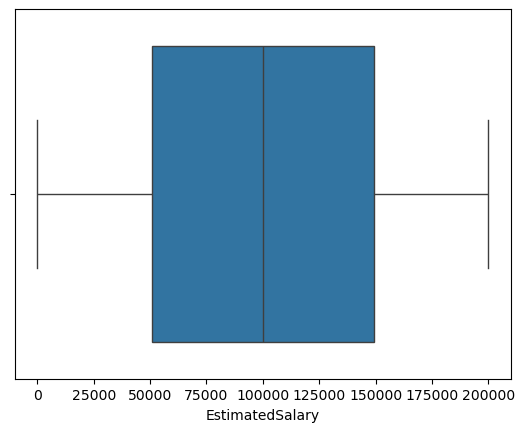

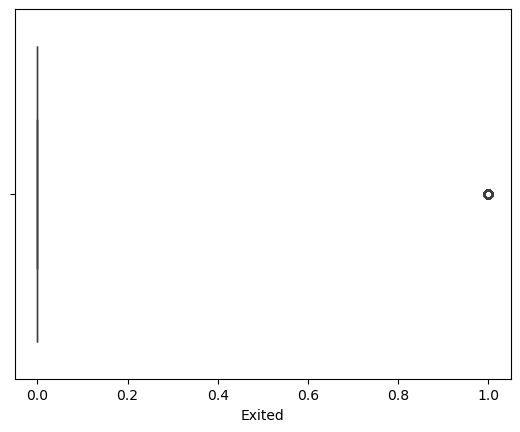

KeyError: 'Age_BoxCox'

In [29]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

In [30]:
# Check skewness of tenure
print("Skewness of tenure:", skew(df['Tenure'].dropna()))

Skewness of tenure: 0.010989809189781041


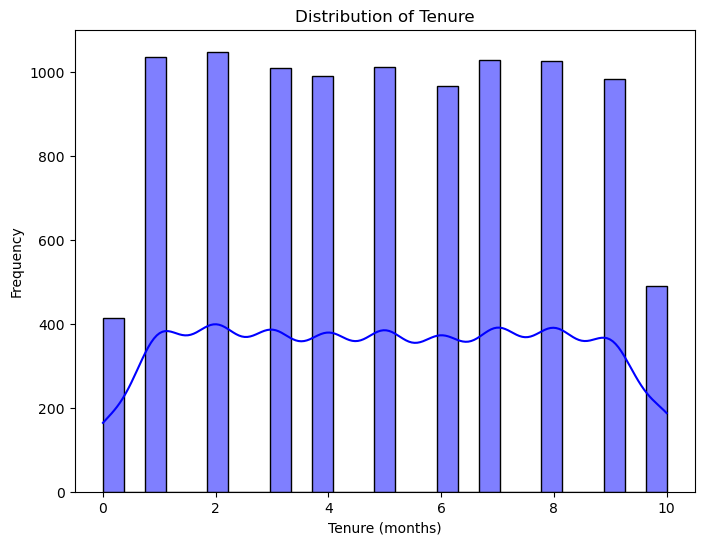

In [31]:
# Plot histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

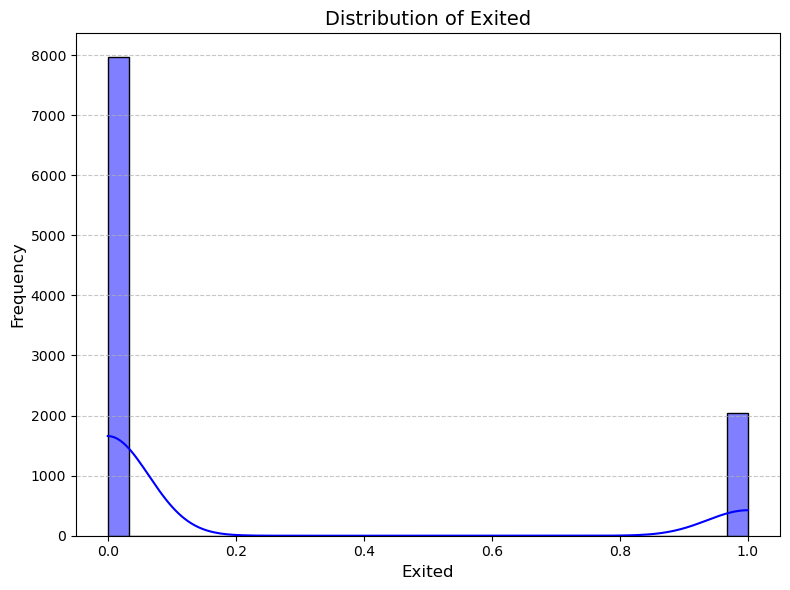

In [32]:
# Plot histogram of the 'Exited' column
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(df['Exited'], kde=True, color='blue', bins=30)  
plt.title('Distribution of Exited', fontsize=14)  # Add a descriptive title with larger font size
plt.xlabel('Exited', fontsize=12)  # Label the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


In [33]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [34]:
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [35]:
df['Geography'].unique()

array([0, 1, 2], dtype=int64)

In [36]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [38]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [48]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [49]:
# Apply SMOTE to both X and y (features and target) together
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
# Check the class distribution after resampling
print("Class distribution after SMOTE on Exited column:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE on Exited column:
Exited
1    7963
0    7963
Name: count, dtype: int64


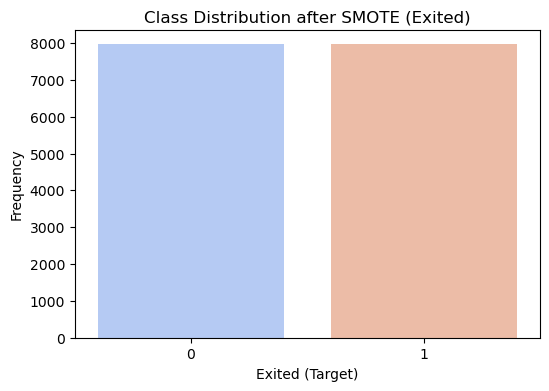

In [43]:
# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='coolwarm')
plt.title('Class Distribution after SMOTE (Exited)')
plt.xlabel('Exited (Target)')
plt.ylabel('Frequency')
plt.show()

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32687761, -0.9025865 , -1.09598752, ...,  0.45349267,
        -0.94071698,  0.64609167],
       [-0.44080365,  0.301665  , -1.09598752, ...,  0.3610571 ,
        -0.94071698, -1.54776799],
       [-1.53863634, -0.9025865 , -1.09598752, ...,  0.45349267,
         2.25345538,  0.64609167],
       ...,
       [ 0.60524449, -0.9025865 , -1.09598752, ..., -0.14652532,
        -0.94071698, -1.54776799],
       [ 1.25772996,  1.50591651,  0.91241915, ...,  0.45349267,
         0.86662958,  0.64609167],
       [ 1.4648682 , -0.9025865 , -1.09598752, ..., -1.17031741,
        -0.94071698,  0.64609167]])

In [51]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# List to store results
results = []

# Train, predict, and evaluate models
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })
    
    # Print results
    print(f"{model_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc}")
    print("-" * 30)

# Display summary results
print("Summary Results:")
for result in results:
    print(result)


Training and evaluating Logistic Regression...
Logistic Regression Performance:
  Accuracy: 0.6985
  Precision: 0.3232
  Recall: 0.4885
  F1-Score: 0.3891
  ROC AUC: 0.6733802970781457
------------------------------
Training and evaluating Decision Tree...
Decision Tree Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC AUC: 1.0
------------------------------
Training and evaluating Random Forest...
Random Forest Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  ROC AUC: 1.0
------------------------------
Training and evaluating Gradient Boosting...
Gradient Boosting Performance:
  Accuracy: 0.8510
  Precision: 0.6234
  Recall: 0.6107
  F1-Score: 0.6170
  ROC AUC: 0.8761675620812887
------------------------------
Training and evaluating Support Vector Machine...
Support Vector Machine Performance:
  Accuracy: 0.4520
  Precision: 0.2290
  Recall: 0.7557
  F1-Score: 0.3515
  ROC AUC: 0.5878844305527187
---

In [52]:
gb_model = XGBClassifier()
gb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
gb_pred = gb_model.predict(X_test)
gb_pred

array([0, 0, 0, ..., 1, 0, 1])

In [54]:
df.drop(columns=['Exited'])

,CreditScore,Geography,Gender,Tenure,Balance,IsActiveMember,EstimatedSalary,Age,NumOfProducts,HasCrCard
0,619.0,0,0,2,0.00,1,101348.88,2.530867,1.000000,0.693147
1,608.0,1,0,1,83807.86,1,112542.58,2.520415,1.000000,0.000000
2,502.0,0,0,8,159660.80,0,113931.57,2.530867,1.732051,0.693147
3,699.0,0,0,1,0.00,0,93826.63,2.498541,1.414214,0.000000
4,850.0,1,0,2,125510.82,1,79084.10,2.541019,1.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,5,0.00,0,96270.64,2.498541,1.414214,0.693147
9996,516.0,0,1,10,57369.61,1,101699.77,2.450364,1.000000,0.693147
9997,709.0,0,0,7,0.00,1,42085.58,2.463018,1.000000,0.000000
9998,772.0,2,1,3,75075.31,0,92888.52,2.530867,1.414214,0.693147


In [55]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(),[0,3,4,5,6,8,9]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), [1,2])
], remainder='passthrough')

In [56]:
model = Pipeline(steps=[('transformer', transformer),
                        ('model',XGBClassifier(random_state=421))])

In [57]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [0, 3, 4, 5, 6, 8, 9]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1, 2])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=421, ...))])

In [58]:
ypred = model.predict(X_test)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [59]:
import joblib
with open('chrunp.pkl', 'wb') as f:
    joblib.dump(model, f)